In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print('train image:', X_train.shape[0])
print('test image:', X_test.shape[0])

train image: 60000
test image: 10000


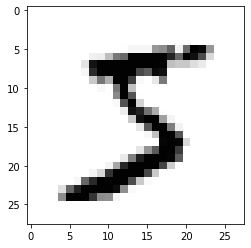

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
import sys

for x in X_train[0]:
  for i in x:
    sys.stdout.write('%d\t' %i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [0]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [0]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [9]:
print('class : %d' %(Y_class_train[0]))

class : 5


In [10]:
Y_class_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [14]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)
modelpath = './model/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

print('\n test accuracy: %.4f' %(model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.16664, saving model to ./model/01-0.166643.hdf5

Epoch 00002: val_loss improved from 0.16664 to 0.11509, saving model to ./model/02-0.115085.hdf5

Epoch 00003: val_loss improved from 0.11509 to 0.08578, saving model to ./model/03-0.085776.hdf5

Epoch 00004: val_loss improved from 0.08578 to 0.07629, saving model to ./model/04-0.076287.hdf5

Epoch 00005: val_loss improved from 0.07629 to 0.07282, saving model to ./model/05-0.072816.hdf5

Epoch 00006: val_loss improved from 0.07282 to 0.06352, saving model to ./model/06-0.063516.hdf5

Epoch 00007: val_loss improved from 0.06352 to 0.06351, saving model to ./model/07-0.063508.hdf5

Epoch 00008: val_loss improved from 0.06351 to 0.06292, saving model to ./model/08-0.062921.hdf5

Epoch 00009: val_loss did not improve from 0.06292

Epoch 00010: val_loss did not improve from 0.06292

Epoch 00011: val_loss did not improve from 0.06292

Epoch 00012: val_loss improved from 0.06292 to 0.06120, saving 

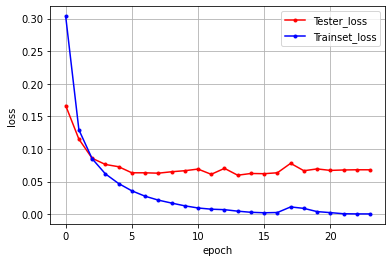

In [23]:
import matplotlib.pyplot as plt
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Tester_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [30]:
from keras.datasets import mnist

(x, y) = mnist.load_data()
print(x[0].shape)

(60000, 28, 28)



Epoch 00001: val_loss improved from inf to 0.05597, saving model to ./model/01-0.0560.hdf5

Epoch 00002: val_loss improved from 0.05597 to 0.03834, saving model to ./model/02-0.0383.hdf5

Epoch 00003: val_loss improved from 0.03834 to 0.03242, saving model to ./model/03-0.0324.hdf5

Epoch 00004: val_loss did not improve from 0.03242

Epoch 00005: val_loss improved from 0.03242 to 0.03014, saving model to ./model/05-0.0301.hdf5

Epoch 00006: val_loss did not improve from 0.03014

Epoch 00007: val_loss improved from 0.03014 to 0.02943, saving model to ./model/07-0.0294.hdf5

Epoch 00008: val_loss improved from 0.02943 to 0.02826, saving model to ./model/08-0.0283.hdf5

Epoch 00009: val_loss improved from 0.02826 to 0.02753, saving model to ./model/09-0.0275.hdf5

Epoch 00010: val_loss did not improve from 0.02753

Epoch 00011: val_loss did not improve from 0.02753

Epoch 00012: val_loss improved from 0.02753 to 0.02587, saving model to ./model/12-0.0259.hdf5

Epoch 00013: val_loss did n

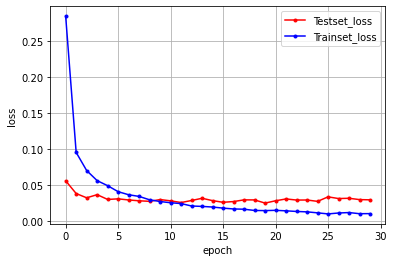

In [33]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])
print('\n test accuracy:%.4f'%(model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [34]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = '해보지 않으면 해낼 수 없다'
result = text_to_word_sequence(text)
print(result)

['해보지', '않으면', '해낼', '수', '없다']


In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화합니다.', '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.', '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.']
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_counts)

OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])


In [36]:
token.document_count

3

In [37]:
token.word_docs

defaultdict(int,
            {'각': 1,
             '결과는': 1,
             '나누어': 1,
             '단어로': 1,
             '단어를': 1,
             '딥러닝에서': 2,
             '먼저': 1,
             '사용할': 1,
             '수': 1,
             '인식됩니다': 1,
             '있습니다': 1,
             '텍스트의': 2,
             '토큰화한': 1,
             '토큰화합니다': 1,
             '토큰화해야': 1})

In [38]:
token.word_index

{'각': 4,
 '결과는': 12,
 '나누어': 6,
 '단어로': 8,
 '단어를': 5,
 '딥러닝에서': 2,
 '먼저': 3,
 '사용할': 13,
 '수': 14,
 '인식됩니다': 10,
 '있습니다': 15,
 '텍스트의': 1,
 '토큰화한': 11,
 '토큰화합니다': 7,
 '토큰화해야': 9}

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
text = '가가가가 나나나 가가 나 다 다다 다다다다'

token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'가가가가': 1, '나나나': 2, '가가': 3, '나': 4, '다': 5, '다다': 6, '다다다다': 7}


In [42]:
x = token.texts_to_sequences([text])
print(x)

[[1, 2, 3, 4, 5, 6, 7]]


In [43]:
from tensorflow.keras.utils import to_categorical

word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes=word_size)

print(x)

[[[0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]]]


In [0]:
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(16, 4))

In [0]:
import numpy as np

docs = ['너무 재밌어요', '최고예요', '참 잘 만든 영화예요','추천하고 싶은 영화예요', '한 번 더 보고 싶네요',
        '글쎄요', '별로예요', '생각보다 지루하네요', '연기가 어색해요', '재미없어요']
classes = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [50]:
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'영화예요': 1, '너무': 2, '재밌어요': 3, '최고예요': 4, '참': 5, '잘': 6, '만든': 7, '추천하고': 8, '싶은': 9, '한': 10, '번': 11, '더': 12, '보고': 13, '싶네요': 14, '글쎄요': 15, '별로예요': 16, '생각보다': 17, '지루하네요': 18, '연기가': 19, '어색해요': 20, '재미없어요': 21}


In [51]:
x = token.texts_to_sequences(docs)
print(x)

[[2, 3], [4], [5, 6, 7, 1], [8, 9, 1], [10, 11, 12, 13, 14], [15], [16], [17, 18], [19, 20], [21]]


In [54]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_x = pad_sequences(x, 4)
print(padded_x)

[[ 0  0  2  3]
 [ 0  0  0  4]
 [ 5  6  7  1]
 [ 0  8  9  1]
 [11 12 13 14]
 [ 0  0  0 15]
 [ 0  0  0 16]
 [ 0  0 17 18]
 [ 0  0 19 20]
 [ 0  0  0 21]]


In [56]:
word_size = len(token.word_index) + 1
print(word_size)

22


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)

print('\n accuracy:%.4f' %(model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.2000
Epoch 2/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.3000
Epoch 3/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.3000
Epoch 4/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4000
Epoch 5/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.7000
Epoch 8/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.8000
Epoch 9/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.8000
Epoch 10/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.8000
Epoch 11/20
1/1 [======================

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              176       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [59]:
from keras.datasets import reuters

(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 1s 0us/step


In [60]:
import numpy as np

category = np.max(Y_train) + 1
print('category:', category)
print('X_train len:', len(X_train))
print('X_test len:', len(X_test))
print(X_train[0])

category: 46
X_train len: 8982
X_test len: 2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [0]:
from keras.preprocessing import sequence
from keras.utils import np_utils

x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 24s 3ms/step - loss: 2.6198 - accuracy: 0.3370 - val_loss: 2.2157 - val_accuracy: 0.4791
Epoch 2/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.9969 - accuracy: 0.4811 - val_loss: 1.8199 - val_accuracy: 0.5298
Epoch 3/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.7791 - accuracy: 0.5304 - val_loss: 1.7625 - val_accuracy: 0.5476
Epoch 4/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.6875 - accuracy: 0.5616 - val_loss: 1.6886 - val_accuracy: 0.5717
Epoch 5/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.6309 - accuracy: 0.5797 - val_loss: 1.6687 - val_accuracy: 0.5739
Epoch 6/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.5797 - accuracy: 0.5934 - val_loss: 1.6542 - val_accuracy: 0.5873
Epoch 7/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.513

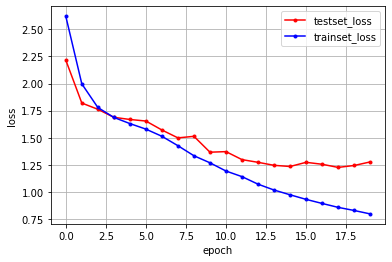

In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

import numpy as np

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))
print('\n test accuracy:%.4f'%(model.evaluate(x_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 22s 877us/step - loss: 0.4504 - accuracy: 0.7700 - val_loss: 0.3338 - val_accuracy: 0.8529
Epoch 2/5
25000/25000 [==============================] - 21s 841us/step - loss: 0.2886 - accuracy: 0.8780 - val_loss: 0.3256 - val_accuracy: 0.8582
Epoch 3/5
25000/25000 [==============================] - 21s 840us/step - loss: 0.2468 - accuracy: 0.8990 - val_loss: 0.3379 - val_accuracy: 0.8550
Epoch 4/5
25000/25000 [==============================] - 21s 851us/step - loss: 0.2053 - accuracy: 0.9201 - val_loss: 0.3417 - val_accuracy: 0.8566
Epoch 5/5
25000/25000 [==============================] - 5s 210us/step

 test accuracy: 0.8520


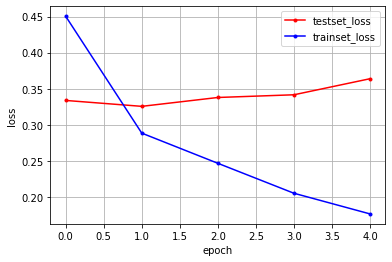

In [67]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))
print('\n test accuracy: %.4f' %(model.evaluate(x_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()